<h4>Read, Display and Write an Image using OpenCV</h4>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading an image
# --> imread(filename, flags)
# Flags: cv2.IMREAD_UNCHANGED  or -1 // cv2.IMREAD_GRAYSCALE  or 0 // cv2.IMREAD_COLOR  or 1 (default = 1)
# Note: OpenCV reads color images in BGR format. So, when using OpenCV with other toolkits, remember to swap the blue and red color channels
img_color = cv2.imread('Hau.jpg',cv2.IMREAD_COLOR)
img_grayscale = cv2.imread('Hau.jpg',cv2.IMREAD_GRAYSCALE)
img_unchanged = cv2.imread('Hau.jpg',cv2.IMREAD_UNCHANGED)

Text(0.5, 1.0, 'color image')

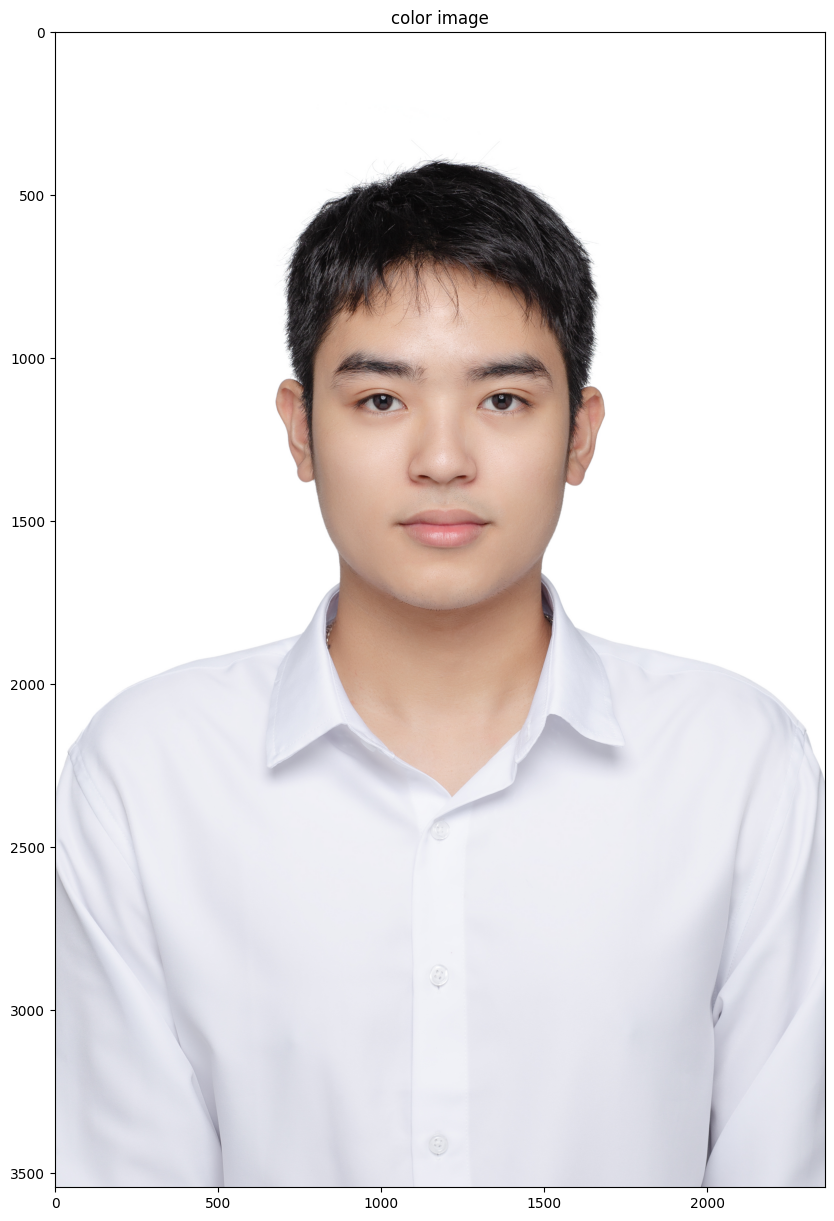

In [11]:
# displaying an image
# --> imshow(window_name, image)
cv2.imshow('color image',img_color)  
cv2.imshow('grayscale image',img_grayscale)
cv2.imshow('unchanged image',img_unchanged)
 
# Waits for a keystroke
# Some example for waitKey:
# --> cv2.waitKey(2000): the window will be displayed (miliseconds)
# --> cv2.waitKey(0): waits indefinitely for a keystroke
cv2.waitKey(0)  
 
# Destroys all the windows created
cv2.destroyAllWindows() 

plt.figure(figsize=[15,15])
plt.imshow(img_color[:,:,::-1]);plt.title("color image")

In [5]:
# writing/saving an image
# --> imwrite(filename, image)
cv2.imwrite('grayscale.jpg',img_grayscale)

True

<h4>Image Resizing with OpenCV</h4>

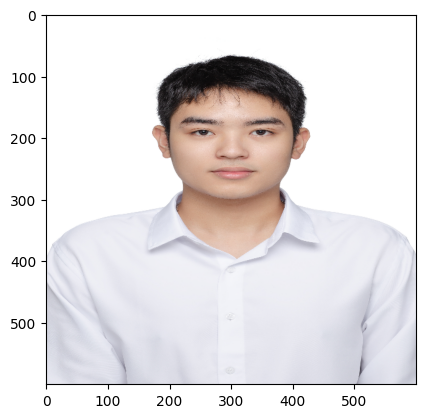

In [12]:
# Resizing by Specifying Width and Height
resized_Down = cv2.resize(img_color, (600, 600), interpolation= cv2.INTER_LINEAR)
plt.imshow(resized_Down[:,:,::-1])

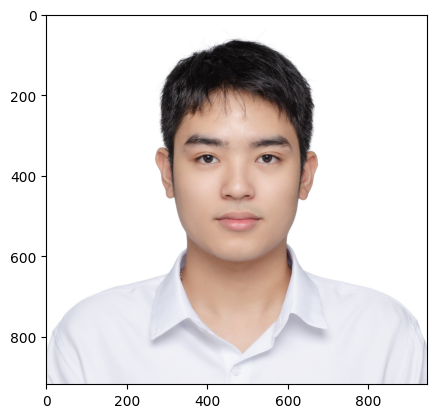

In [6]:
# Resizing With a Scaling Factor
scaledDown = cv2.resize(img_color, None, fx= 0.4, fy= 0.4, interpolation= cv2.INTER_LINEAR)
plt.imshow(scaledDown[:,:,::-1])

In [ ]:
#  Resizing With Different Interpolation Methods
# Different interpolation methods are used for different resizing purposes.
# --> INTER_AREA: INTER_AREA uses pixel area relation for resampling. This is best suited for reducing the size of an image (shrinking). 
# --> INTER_CUBIC: This uses bicubic interpolation for resizing the image. While resizing and interpolating new pixels, 
# this method acts on the 4×4 neighboring pixels of the image. It then takes the weights average of the 16 pixels to create the new interpolated pixel.
# --> INTER_LINEAR: This method is somewhat similar to the INTER_CUBIC interpolation. 
# But unlike INTER_CUBIC, this uses 2×2 neighboring pixels to get the weighted average for the interpolated pixel.

<h4>Cropping an Image using OpenCV</h4>

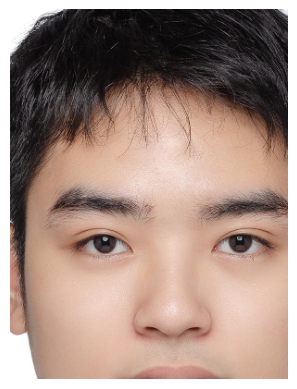

In [18]:
# cropping an image
cropped_image = scaledDown[200:600, 300:600]
# plt.imshow(cropped_image[:,:,::-1])
plt.axis("off")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

<h4>Image Translation and Rotation Using OpenCV</h4>

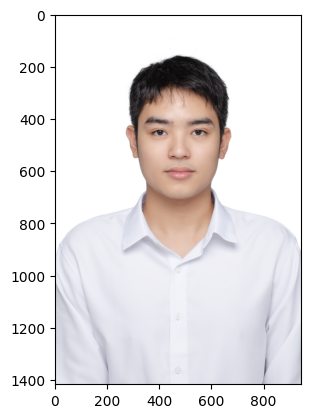

In [20]:
# caculate the center
height, width = scaledDown.shape[:2]
center = (width/2, height/2)
plt.imshow(scaledDown[:, :, ::-1])

In [28]:
# use cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=0.5)
print(rotate_matrix)

[[ 3.53553391e-01  3.53553391e-01  5.49534457e+01]
 [-3.53553391e-01  3.53553391e-01  6.25061400e+02]]


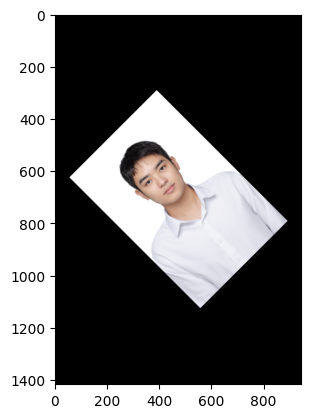

In [29]:
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=scaledDown, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image[:, :, ::-1])

In [44]:
# transition image
# tx: how much units we want to move the image in x-direction
# ty: how much units we want to move the image in y-direction
tx, ty = width / 4, height / 4 
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [2, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

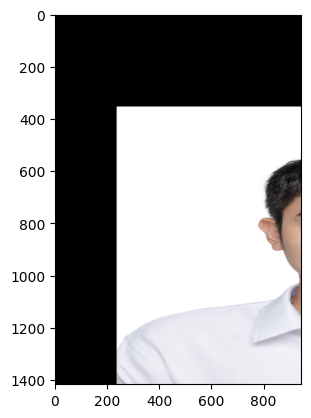

In [45]:
# apply the translation to the image
translated_image = cv2.warpAffine(
    src=scaledDown, M=translation_matrix, dsize=(width, height)
)
plt.imshow(translated_image[:, :, ::-1])

<h3>Affine Transformation</h3>

Trong phép biến đổi affine, tất cả các đường thẳng song song trong ảnh gốc sẽ vẫn song song trong ảnh đầu ra. Để tìm ma trận biến đổi, chúng ta cần ba điểm từ ảnh đầu vào và vị trí tương ứng của chúng trong ảnh đầu ra. Sau đó <b>cv2.getAffineTransform</b> sẽ tạo một ma trận 2x3 để chuyển tới <b>cv2.warpAffine</b> .

Công thức cho biến đổi Affine: <br>
[x', y'](T) = [ [a b c] [d e f] ] * [x y 1](T) (ma trận 2x1 = 2x3 x 3x1)

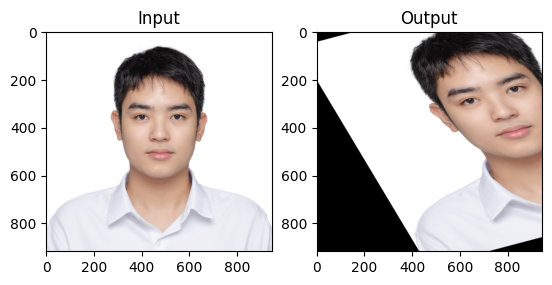

In [7]:
rows, cols, chanels = scaledDown.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(scaledDown, M, (cols,rows))

plt.subplot(121),plt.imshow(scaledDown[:,:,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title('Output')
plt.show()

<h3>Perspective Transformation</h3>

Để chuyển đổi phối cảnh, bạn cần ma trận chuyển đổi 3x3. Các đường thẳng sẽ vẫn thẳng ngay cả sau khi chuyển đổi. Để tìm ma trận biến đổi này, bạn cần 4 điểm trên ảnh đầu vào và các điểm tương ứng trên ảnh đầu ra. Trong 4 điểm đó có 3 điểm không thẳng hàng. Sau đó, ma trận biến đổi có thể được tìm thấy bằng hàm cv2.getPerspectiveTransform . Sau đó áp dụng cv2.warpPerspective với ma trận chuyển đổi 3x3 này.

Nguyên tắc là cần tìm ma trận 3x3: [a11 a12 a13 a21 a22 a23 a31 a32 a33] để biến đổi từ (x,y) sang (x',y') theo công thức:

x' = (a11 * x + a12 * y + a13) / (a31 * x + a32 * y + a33)

y' = (a21 * x + a22 * y + a23) / (a31 * x + a32 * y + a33)

Từ 4 cặp điểm cung cấp, hàm cv2.getPerspectiveTransform sẽ giải tìm ma trận sử dụng hệ phương trình tuyến tính

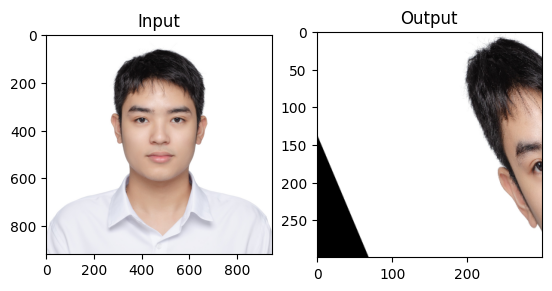

In [11]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[200,0],[100,300],[300,200]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(scaledDown,M,(300,300))

plt.subplot(121),plt.imshow(scaledDown[:,:,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title('Output')
plt.show()

<h4>Annotating Images Using OpenCV </h4>

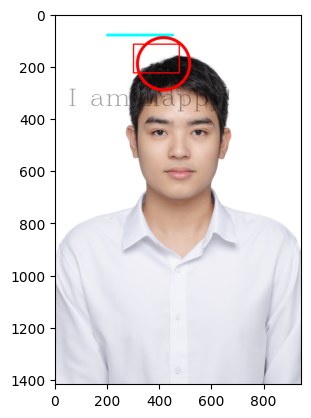

In [58]:
plt.imshow(scaledDown[:, :, ::-1])

# Draw a line
imageDraw = scaledDown.copy()
pointStart = (200,80)
pointEnd = (450,80)
cv2.line(imageDraw, pointStart, pointEnd, (255, 255, 0), thickness=10)

# Draw a cycle
circle_center = (415,190)
radius =100
cv2.circle(imageDraw, circle_center, radius, (0, 0, 255), thickness=10, lineType=cv2.LINE_AA) 

# Draw a rectangle
start_point =(300,115)
end_point =(475,225)
cv2.rectangle(imageDraw, start_point, end_point, (0, 0, 255), thickness= 3, lineType=cv2.LINE_8) 

# Draw a text
text = 'I am happy!'
org = (50,350)
cv2.putText(imageDraw, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 3, color = (0,0,0))

plt.imshow(imageDraw[:, :, ::-1])